In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "anemia-types-classification"

# **Import**

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
data <- read_csv('/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv',show_col_types = FALSE)

**Data Dictionary:**
* **HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.**
* **PlT: The number of platelets in the blood, involved in blood clotting.**
* **WBC: The count of white blood cells, vital for immune response.**
* **RBC: The count of red blood cells, responsible for oxygen transport.**
* **MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.**
* **MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.**
* **MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.**
* **PDW: a measurement of the variability in platelet size distribution in the blood**
* **PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis**
* **Diagnosis: Anemia type based on the CBC parameters**

In [4]:
dim(data)

[1] 1281   15

In [5]:
str(data)

spc_tbl_ [1,281 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ WBC      : num [1:1281] 10 10 7.2 6 4.2 6.6 16.7 9.3 5.2 10.5 ...
 $ LYMp     : num [1:1281] 43.2 42.4 30.7 30.2 39.1 27.3 19.1 27.4 19.7 12.4 ...
 $ NEUTp    : num [1:1281] 50.1 52.3 60.7 63.5 53.7 65.4 68.2 64 72.4 79 ...
 $ LYMn     : num [1:1281] 4.3 4.2 2.2 1.8 1.6 1.8 3.2 2.6 1 1.3 ...
 $ NEUTn    : num [1:1281] 5 5.3 4.4 3.8 2.3 4.3 11.4 5.9 3.8 8.3 ...
 $ RBC      : num [1:1281] 2.77 2.84 3.97 4.22 3.93 3.96 5.15 4.39 4.85 4.57 ...
 $ HGB      : num [1:1281] 7.3 7.3 9 3.8 0.4 8.8 14.2 12 13.2 12.4 ...
 $ HCT      : num [1:1281] 24.2 25 30.5 32.8 316 29.7 44.8 37.9 41 38.9 ...
 $ MCV      : num [1:1281] 87.7 88.2 77 77.9 80.6 75.2 87.1 86.4 84.7 85.3 ...
 $ MCH      : num [1:1281] 26.3 25.7 22.6 23.2 23.9 22.2 27.5 27.3 27.2 27.1 ...
 $ MCHC     : num [1:1281] 30.1 20.2 29.5 29.8 29.7 79.6 31.6 31.6 32.1 31.8 ...
 $ PLT      : num [1:1281] 189 180 148 143 236 207 151 194 181 164 ...
 $ PDW      : num [1:1281] 12.5 

In [6]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBC,1,1281,7.862717,3.5644657,7.40000,7.4338634,1.927380,0.80,45.7,44.90,3.7981209,27.7606688,0.09959095
LYMp,2,1281,25.845000,7.0387276,25.84500,25.6044341,0.000000,6.20,91.4,85.20,1.6526717,13.1044526,0.19666161
NEUTp,3,1281,77.511000,147.7462730,77.51100,74.8973405,0.000000,0.70,5317.0,5316.30,34.8646956,1231.8439069,4.12802168
LYMn,4,1281,1.880760,1.3356890,1.88076,1.8241693,0.000000,0.20,41.8,41.60,22.0623987,629.7257543,0.03731907
NEUTn,5,1281,5.140940,2.8722937,5.14094,4.9620918,0.000000,0.50,79.0,78.50,15.6866904,366.6660543,0.08025171
RBC,6,1281,4.708267,2.8172004,4.60000,4.6206244,0.711648,1.36,90.8,89.44,24.5161177,704.4807065,0.07871240
HGB,7,1281,12.184551,3.8128972,12.30000,12.1935610,2.075640,-10.00,87.1,97.10,11.5509035,222.7237400,0.10653211
HCT,8,1281,46.152600,104.8861000,46.15260,43.7158712,0.000000,2.00,3715.0,3713.00,33.6502895,1167.2236343,2.93051111
MCV,9,1281,85.793919,27.1776634,86.60000,85.8809659,6.523440,-79.30,990.0,1069.30,28.5289984,954.6387840,0.75934222


In [7]:
summary(data)

      WBC              LYMp           NEUTp              LYMn       
 Min.   : 0.800   Min.   : 6.20   Min.   :   0.70   Min.   : 0.200  
 1st Qu.: 6.000   1st Qu.:25.84   1st Qu.:  71.10   1st Qu.: 1.881  
 Median : 7.400   Median :25.84   Median :  77.51   Median : 1.881  
 Mean   : 7.863   Mean   :25.84   Mean   :  77.51   Mean   : 1.881  
 3rd Qu.: 8.680   3rd Qu.:25.84   3rd Qu.:  77.51   3rd Qu.: 1.881  
 Max.   :45.700   Max.   :91.40   Max.   :5317.00   Max.   :41.800  
     NEUTn             RBC              HGB              HCT         
 Min.   : 0.500   Min.   : 1.360   Min.   :-10.00   Min.   :   2.00  
 1st Qu.: 5.100   1st Qu.: 4.190   1st Qu.: 10.80   1st Qu.:  39.20  
 Median : 5.141   Median : 4.600   Median : 12.30   Median :  46.15  
 Mean   : 5.141   Mean   : 4.708   Mean   : 12.18   Mean   :  46.15  
 3rd Qu.: 5.141   3rd Qu.: 5.100   3rd Qu.: 13.50   3rd Qu.:  46.15  
 Max.   :79.000   Max.   :90.800   Max.   : 87.10   Max.   :3715.00  
      MCV              MCH 

**Check missing value**

In [8]:
colSums(is.na(data))

WBC      LYMp     NEUTp      LYMn     NEUTn       RBC       HGB       HCT 
        0         0         0         0         0         0         0         0 
      MCV       MCH      MCHC       PLT       PDW       PCT Diagnosis 
        0         0         0         0         0         0         0

**duplicate check**

In [9]:
sum(duplicated(data))

[1] 49

In [10]:
head(data)

WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189,12.5,0.17,Normocytic hypochromic anemia
10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180,12.5,0.16,Normocytic hypochromic anemia
7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148,14.3,0.14,Iron deficiency anemia
6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143,11.3,0.12,Iron deficiency anemia
4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236,12.8,0.22,Normocytic hypochromic anemia
6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207,11.5,0.18,Other microcytic anemia


In [11]:
tail(data)

WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6.70,25.845,77.511,1.88076,5.14094,4.65,9.5,46.1526,62.6,20.4,32.6,200,14.31251,0.26028,Other microcytic anemia
4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180,14.31251,0.26028,Healthy
5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215,14.31251,0.26028,Healthy
9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329,14.31251,0.26028,Healthy
6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174,14.31251,0.26028,Healthy
8.80,25.845,77.511,1.88076,5.14094,4.95,15.2,46.1526,89.7,30.6,34.2,279,14.31251,0.26028,Healthy


# **2. Data Transform**

In [12]:
data <- unique(data)
sum(duplicated(data))

[1] 0

**DataCheck**

In [13]:
head(data,2)

WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189,12.5,0.17,Normocytic hypochromic anemia
10,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180,12.5,0.16,Normocytic hypochromic anemia


# **3. Data Visualization**

* **Histogram**

In [14]:
options(repr.plot.width = 16.0, repr.plot.height = 24.0)

In [15]:
a <- ggplot(data) + 
        geom_histogram(aes(x=WBC), fill = 'red', col = 'gray',binwidth = 1,position = 'dodge') + 
        labs(title = 'WBC Histogram', x = 'WBC', y = 'Count') + 
        theme_bw()

b <- ggplot(data) + 
        geom_histogram(aes(x=LYMp), fill = 'orange',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'LYMp Histogram', x = 'LYMp', y = 'Count') + 
        theme_bw()

c <- ggplot(data) + 
        geom_histogram(aes(x=NEUTp), fill = 'yellow',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'NEUTp Histogram', x = 'NEUTp', y = 'Count') + 
        theme_bw()

d <- ggplot(data) + 
        geom_histogram(aes(x=LYMn), fill = 'green',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'LYMn Histogram', x = 'LYMn', y = 'Count') + 
        theme_bw()

e <- ggplot(data) + 
        geom_histogram(aes(x=NEUTn), fill = 'sky blue',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'NEUTn Histogram', x = 'NEUTn', y = 'Count') + 
        theme_bw()

f <- ggplot(data) +
        geom_histogram(aes(x=RBC), fill = 'blue',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'RBC Histogram', x = 'NEUTn', y = 'Count') + 
        theme_bw()

g <- ggplot(data) +
        geom_histogram(aes(x=HGB), fill = 'violet',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'HGB Histogram', x = 'HGB', y = 'Count') + 
        theme_bw()

h <- ggplot(data) +
        geom_histogram(aes(x=HCT), fill = 'black',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'HCT Histogram', x = 'HCT', y = 'Count') + 
        theme_bw()

i <- ggplot(data) +
        geom_histogram(aes(x=MCV), fill = 'yellow green',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'MCV Histogram', x = 'MCV', y = 'Count') + 
        theme_bw()

j <- ggplot(data) +
        geom_histogram(aes(x=MCH), fill = 'gold',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'MCH Histogram', x = 'MCH', y = 'Count') + 
        theme_bw()

k <- ggplot(data) +
        geom_histogram(aes(x=MCHC), fill = 'gray',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'MCHC Histogram', x = 'MCHC', y = 'Count') + 
        theme_bw()

l <- ggplot(data) +
        geom_histogram(aes(x=PLT), fill = 'dark blue',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'PLT Histogram', x = 'PLT', y = 'Count') + 
        theme_bw()

m <- ggplot(data) +
        geom_histogram(aes(x=PDW), fill = 'dark blue',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'PDW Histogram', x = 'PDW', y = 'Count') + 
        theme_bw()

n <- ggplot(data) +
        geom_histogram(aes(x=PCT), fill = 'pink',col = 'gray', binwidth = 1,position = 'dodge') + 
        labs(title = 'PCT Histogram', x = 'PCT', y = 'Count') + 
        theme_bw()

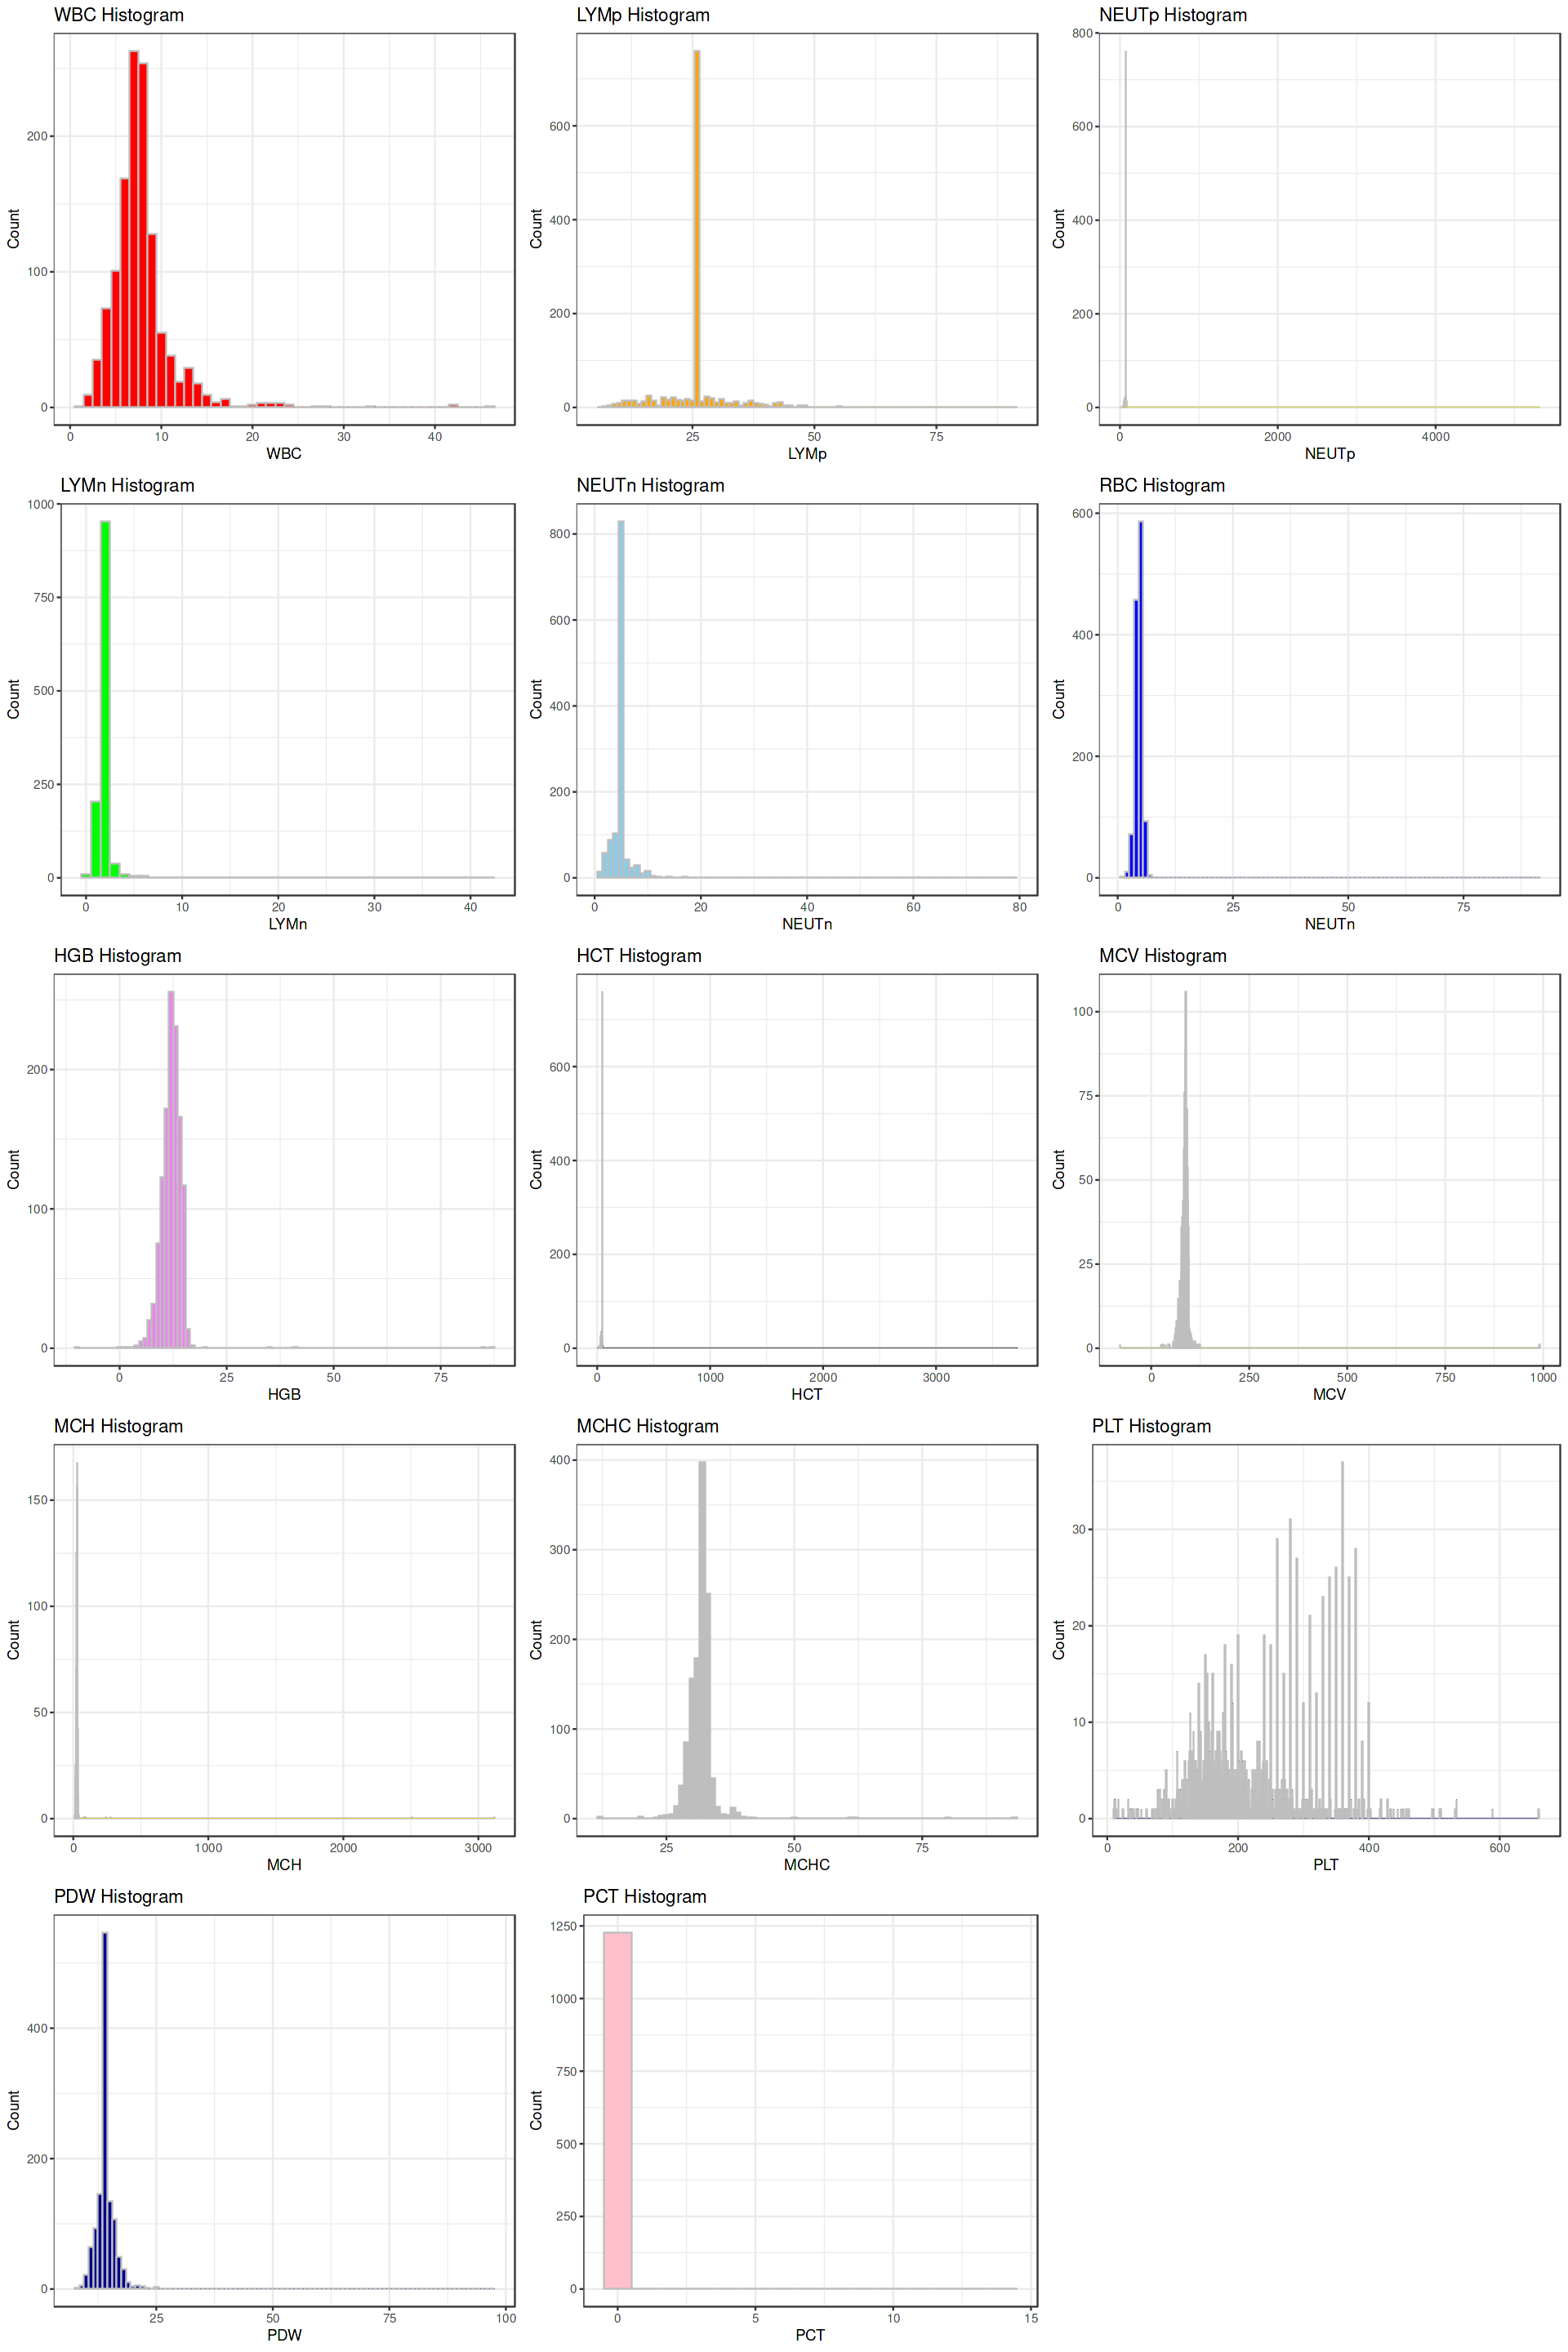

In [16]:
grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l,m,n, ncol = 3)

* **Count Plot**

In [17]:
options(repr.plot.width = 13.0, repr.plot.height = 13.0)

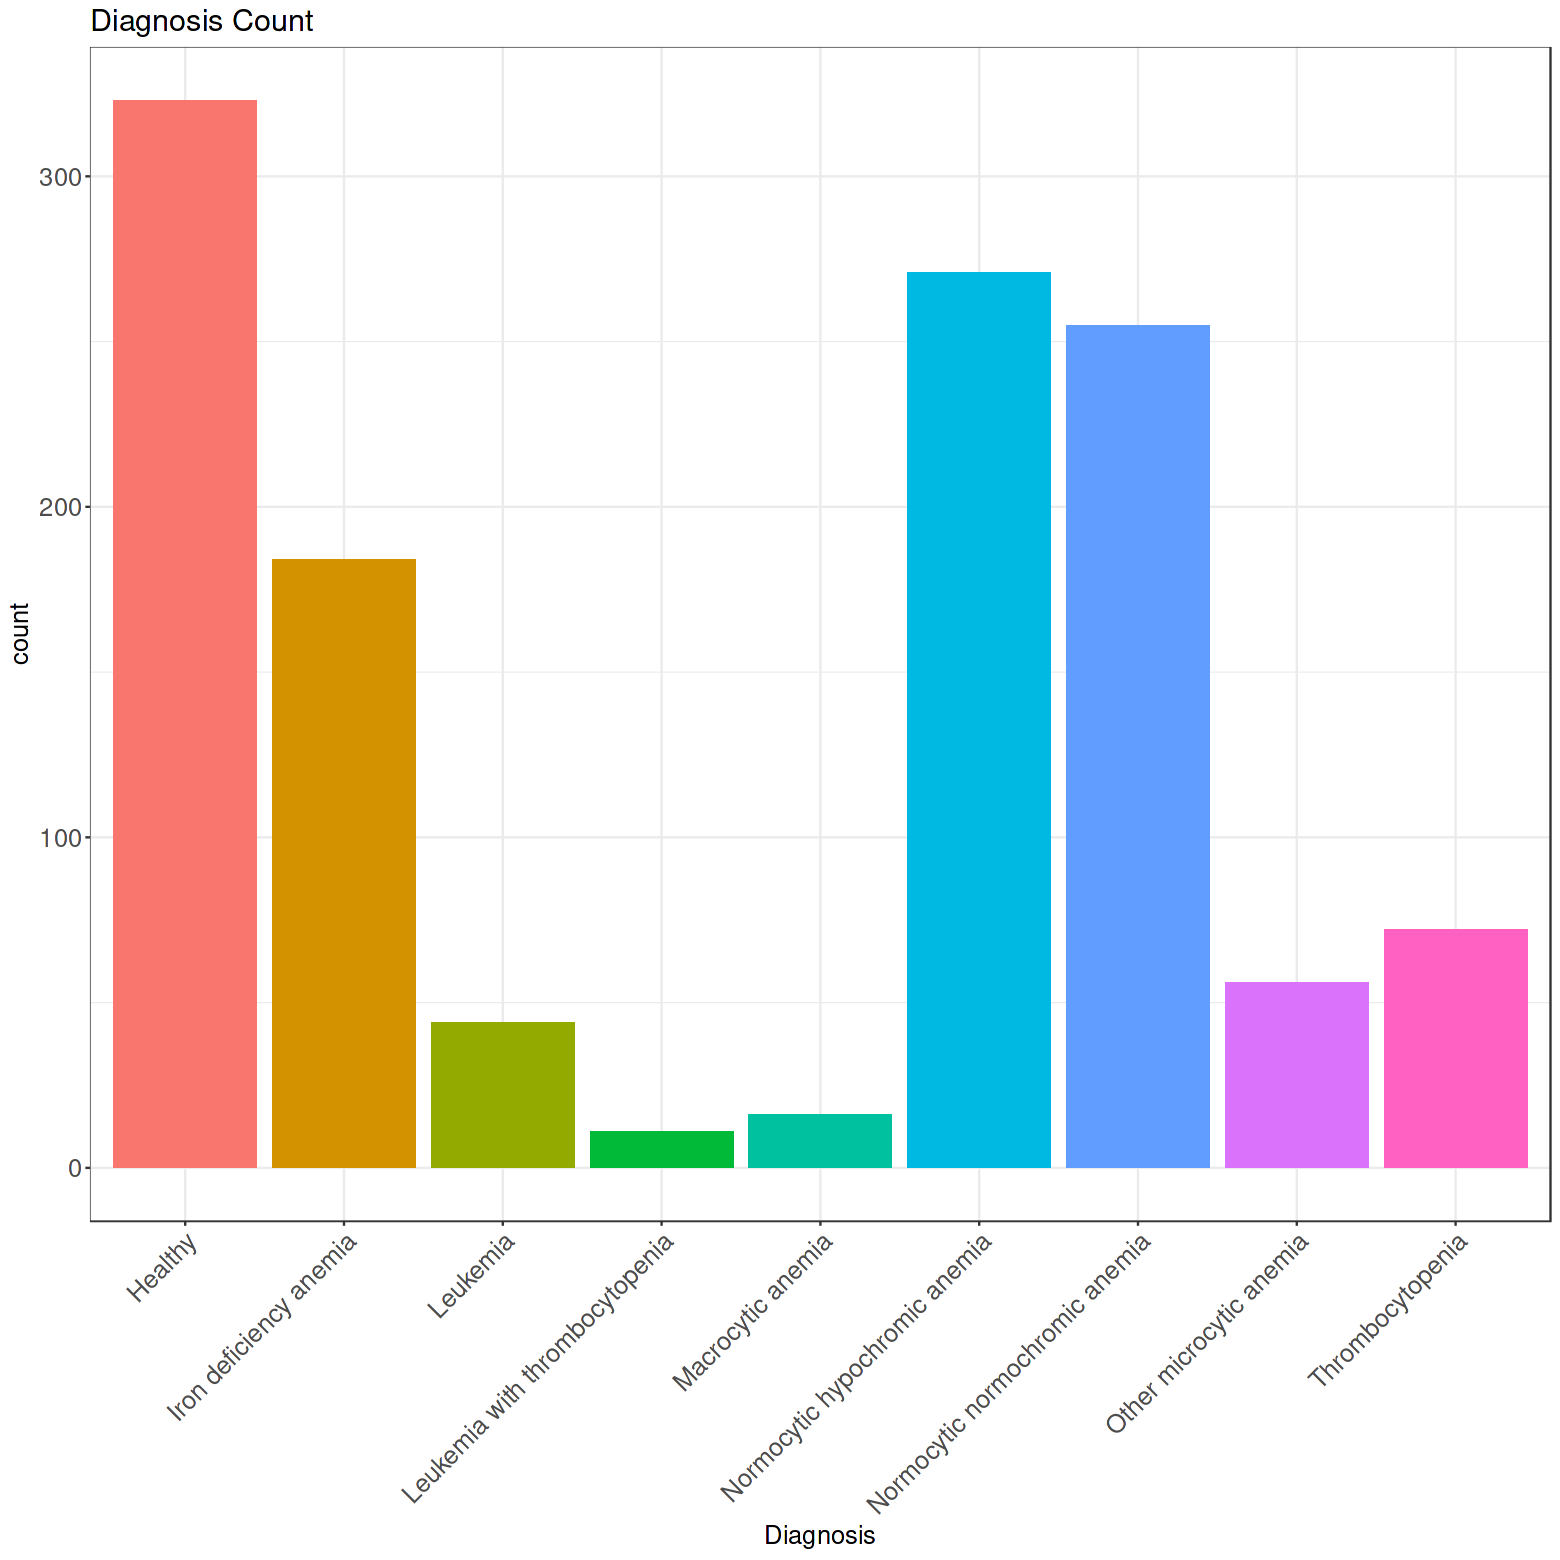

In [18]:
ggplot(data) +     
    geom_bar(aes(x=Diagnosis , fill = Diagnosis)) +   
    theme_bw() +
    ggtitle('Diagnosis Count') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**Correlation**

In [19]:
num_cols <- c('WBC','LYMp','NEUTp','LYMn','NEUTn','RBC','HGB','HCT','MCV','MCH','MCHC','PLT','PDW','PCT')

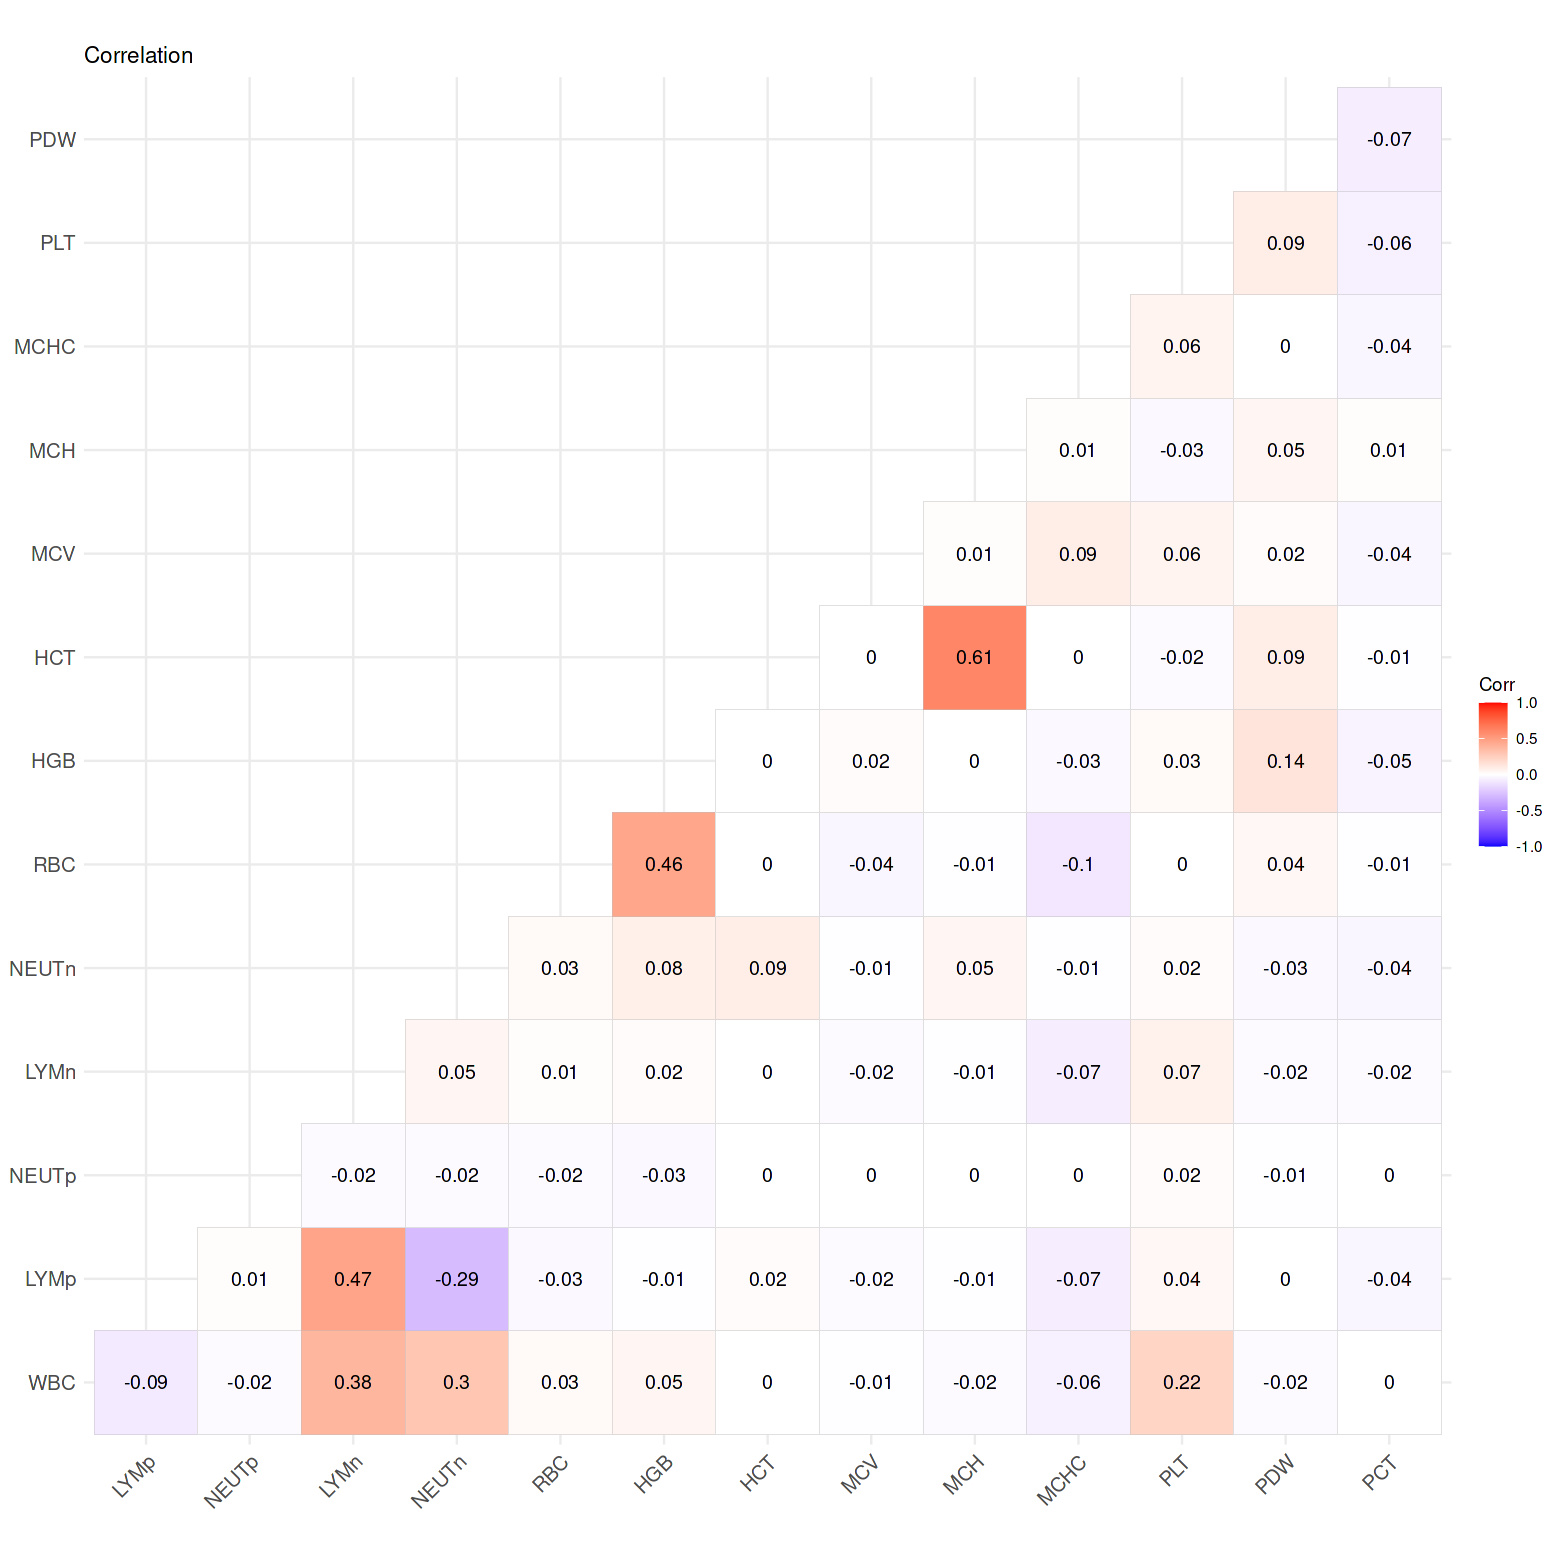

In [20]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [21]:
library(mltools)
library(data.table)
library(caret)
library(randomForest)
library(e1071)
library(keras)


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:

In [22]:
# Data for Keras Use
data2 <- data

In [23]:
data$Diagnosis <- ifelse(data$Diagnosis == 'Healthy','0',
                            ifelse(data$Diagnosis == 'Normocytic hypochromic anemia','1',
                                ifelse(data$Diagnosis == 'Normocytic normochromic anemia','2',
                                    ifelse(data$Diagnosis == 'Iron deficiency anemia','3',
                                        ifelse(data$Diagnosis == 'Thrombocytopenia','4',
                                            ifelse(data$Diagnosis == 'Other microcytic anemia','5', 
                                                ifelse(data$Diagnosis == 'Leukemia','6',
                                                        ifelse(data$Diagnosis == 'Macrocytic anemia','7','8'))))))))

In [24]:
data$Diagnosis <- as.factor(data$Diagnosis)

In [25]:
idx <- sample(nrow(data), 0.7 * nrow(data))
train <- data[idx,]
test <- data[-idx,]

**RandomForest**

In [26]:
RF <- randomForest(Diagnosis ~., data = train, ntree=300, type = "class")

In [27]:
print(RF)


Call:
 randomForest(formula = Diagnosis ~ ., data = train, ntree = 300,      type = "class") 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.51%
Confusion matrix:
    0   1   2   3  4  5  6 7 8 class.error
0 223   0   0   0  0  0  0 0 0 0.000000000
1   0 187   0   0  0  0  0 0 0 0.000000000
2   0   0 176   0  0  0  0 0 1 0.005649718
3   0   0   0 133  0  0  0 0 0 0.000000000
4   1   0   0   0 50  0  0 0 0 0.019607843
5   0   0   0   2  1 34  0 0 0 0.081081081
6   1   0   0   0  0  0 34 0 0 0.028571429
7   0   3   2   0  0  0  0 6 0 0.454545455
8   0   0   0   0  1  0  1 0 6 0.250000000


In [28]:
pred_rf <- predict(RF, test ,type = 'class')
cm_rf <- confusionMatrix(pred_rf, reference = test$Diagnosis)

In [29]:
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6   7   8
         0 100   1   0   0   1   0   1   0   0
         1   0  83   0   0   0   0   0   0   0
         2   0   0  78   0   0   0   0   3   0
         3   0   0   0  51   0   2   0   0   0
         4   0   0   0   0  20   0   0   0   0
         5   0   0   0   0   0  17   0   0   0
         6   0   0   0   0   0   0   8   0   1
         7   0   0   0   0   0   0   0   2   0
         8   0   0   0   0   0   0   0   0   2

Overall Statistics
                                          
               Accuracy : 0.9757          
                 95% CI : (0.9543, 0.9888)
    No Information Rate : 0.2703          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9697          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2

-------------

**Support Vector Machine**

In [30]:
MDSVM <- svm(Diagnosis~., data = train, type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [31]:
pred_svm <- predict(MDSVM,test,type = 'class')

In [32]:
cm_svm <- confusionMatrix(pred_svm, reference = test$Diagnosis)

In [33]:
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3  4  5  6  7  8
         0 89  3  0  0  3  0  1  0  0
         1  5 67  6  5  2  5  0  1  0
         2  3  1 70  0  1  0  0  1  0
         3  2  7  0 45  0  2  1  0  0
         4  0  1  1  0 15  0  0  0  0
         5  1  3  0  1  0 12  0  0  0
         6  0  2  1  0  0  0  7  0  1
         7  0  0  0  0  0  0  0  3  0
         8  0  0  0  0  0  0  0  0  2

Overall Statistics
                                          
               Accuracy : 0.8378          
                 95% CI : (0.7963, 0.8739)
    No Information Rate : 0.2703          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7982          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8900   0.7976   0.8974   0.8824  0.71

------------

**Keras**

In [34]:
data2$Diagnosis <- ifelse(data2$Diagnosis == 'Healthy',0,
                            ifelse(data2$Diagnosis == 'Normocytic hypochromic anemia',1,
                                ifelse(data2$Diagnosis == 'Normocytic normochromic anemia',2,
                                    ifelse(data2$Diagnosis == 'Iron deficiency anemia',3,
                                        ifelse(data2$Diagnosis == 'Thrombocytopenia',4,
                                            ifelse(data2$Diagnosis == 'Other microcytic anemia',5, 
                                                ifelse(data2$Diagnosis == 'Leukemia',6,
                                                        ifelse(data2$Diagnosis == 'Macrocytic anemia',7,8))))))))

In [35]:
idx2 <- sample(nrow(data2), 0.7 * nrow(data2))
train2 <- data2[idx,]
test2 <- data2[-idx,]

In [36]:
str(train2)

tibble [862 × 15] (S3: tbl_df/tbl/data.frame)
 $ WBC      : num [1:862] 7.1 5.6 6.55 4.7 7.9 4.5 11.5 7.1 5.8 4.2 ...
 $ LYMp     : num [1:862] 28.7 25.8 25.8 25.8 25.8 ...
 $ NEUTp    : num [1:862] 65 77.5 77.5 77.5 77.5 ...
 $ LYMn     : num [1:862] 2 1.88 1.88 1.88 1.88 ...
 $ NEUTn    : num [1:862] 4.6 5.14 5.14 5.14 5.14 ...
 $ RBC      : num [1:862] 4.94 3.7 3.34 3.78 5.1 4.56 6.67 4.14 3.94 3.34 ...
 $ HGB      : num [1:862] 11.1 10.3 9 12 13.4 10.9 13 8.9 10.8 9.2 ...
 $ HCT      : num [1:862] 36.7 46.2 46.2 46.2 46.2 ...
 $ MCV      : num [1:862] 74.3 77 91.3 83.5 90 68.7 69.3 74.2 87.9 85.3 ...
 $ MCH      : num [1:862] 22.4 25 26.9 31.7 29 19.5 19.4 21.4 27.4 27.5 ...
 $ MCHC     : num [1:862] 30.2 32 29.5 35 32 28.4 28.1 28.9 31.2 32.3 ...
 $ PLT      : num [1:862] 213 180 153 178 340 77 390 275 224 107 ...
 $ PDW      : num [1:862] 17.2 13.4 14.3 14.3 12.7 ...
 $ PCT      : num [1:862] 0.2 0.26 0.26 0.26 0.26 ...
 $ Diagnosis: num [1:862] 3 5 1 2 0 3 6 3 1 2 ...


In [37]:
x_train <- train2[,1:14]
y_train <- train$Diagnosis

x_test <- test2[,1:14]
y_test <- test2$Diagnosis

y_train <- to_categorical(y_train)
y_test <- to_categorical(y_test)

x_train <- data.matrix(x_train, rownames.force = NA)
x_test <- data.matrix(x_test,rownames.force = NA)

In [38]:
model <- keras_model_sequential() %>%
    layer_dense(units=16 , activation = 'relu', input_shape = ncol(x_train)) %>%
    layer_dense(units=16 , activation = 'relu') %>%
    layer_dense(units = ncol(y_train), activation = 'softmax')

In [39]:
model %>% compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = c('accuracy')
)

In [40]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 16)                      240         
 dense_1 (Dense)                    (None, 16)                      272         
 dense (Dense)                      (None, 9)                       153         
Total params: 665
Trainable params: 665
Non-trainable params: 0
________________________________________________________________________________


In [41]:
history <- model %>% fit(
        x_train, 
        y_train,
        call_back = call_back_tensorboard(log_dir = 'logs/run_b'),
        epochs = 60 , batch_size = 128,
)

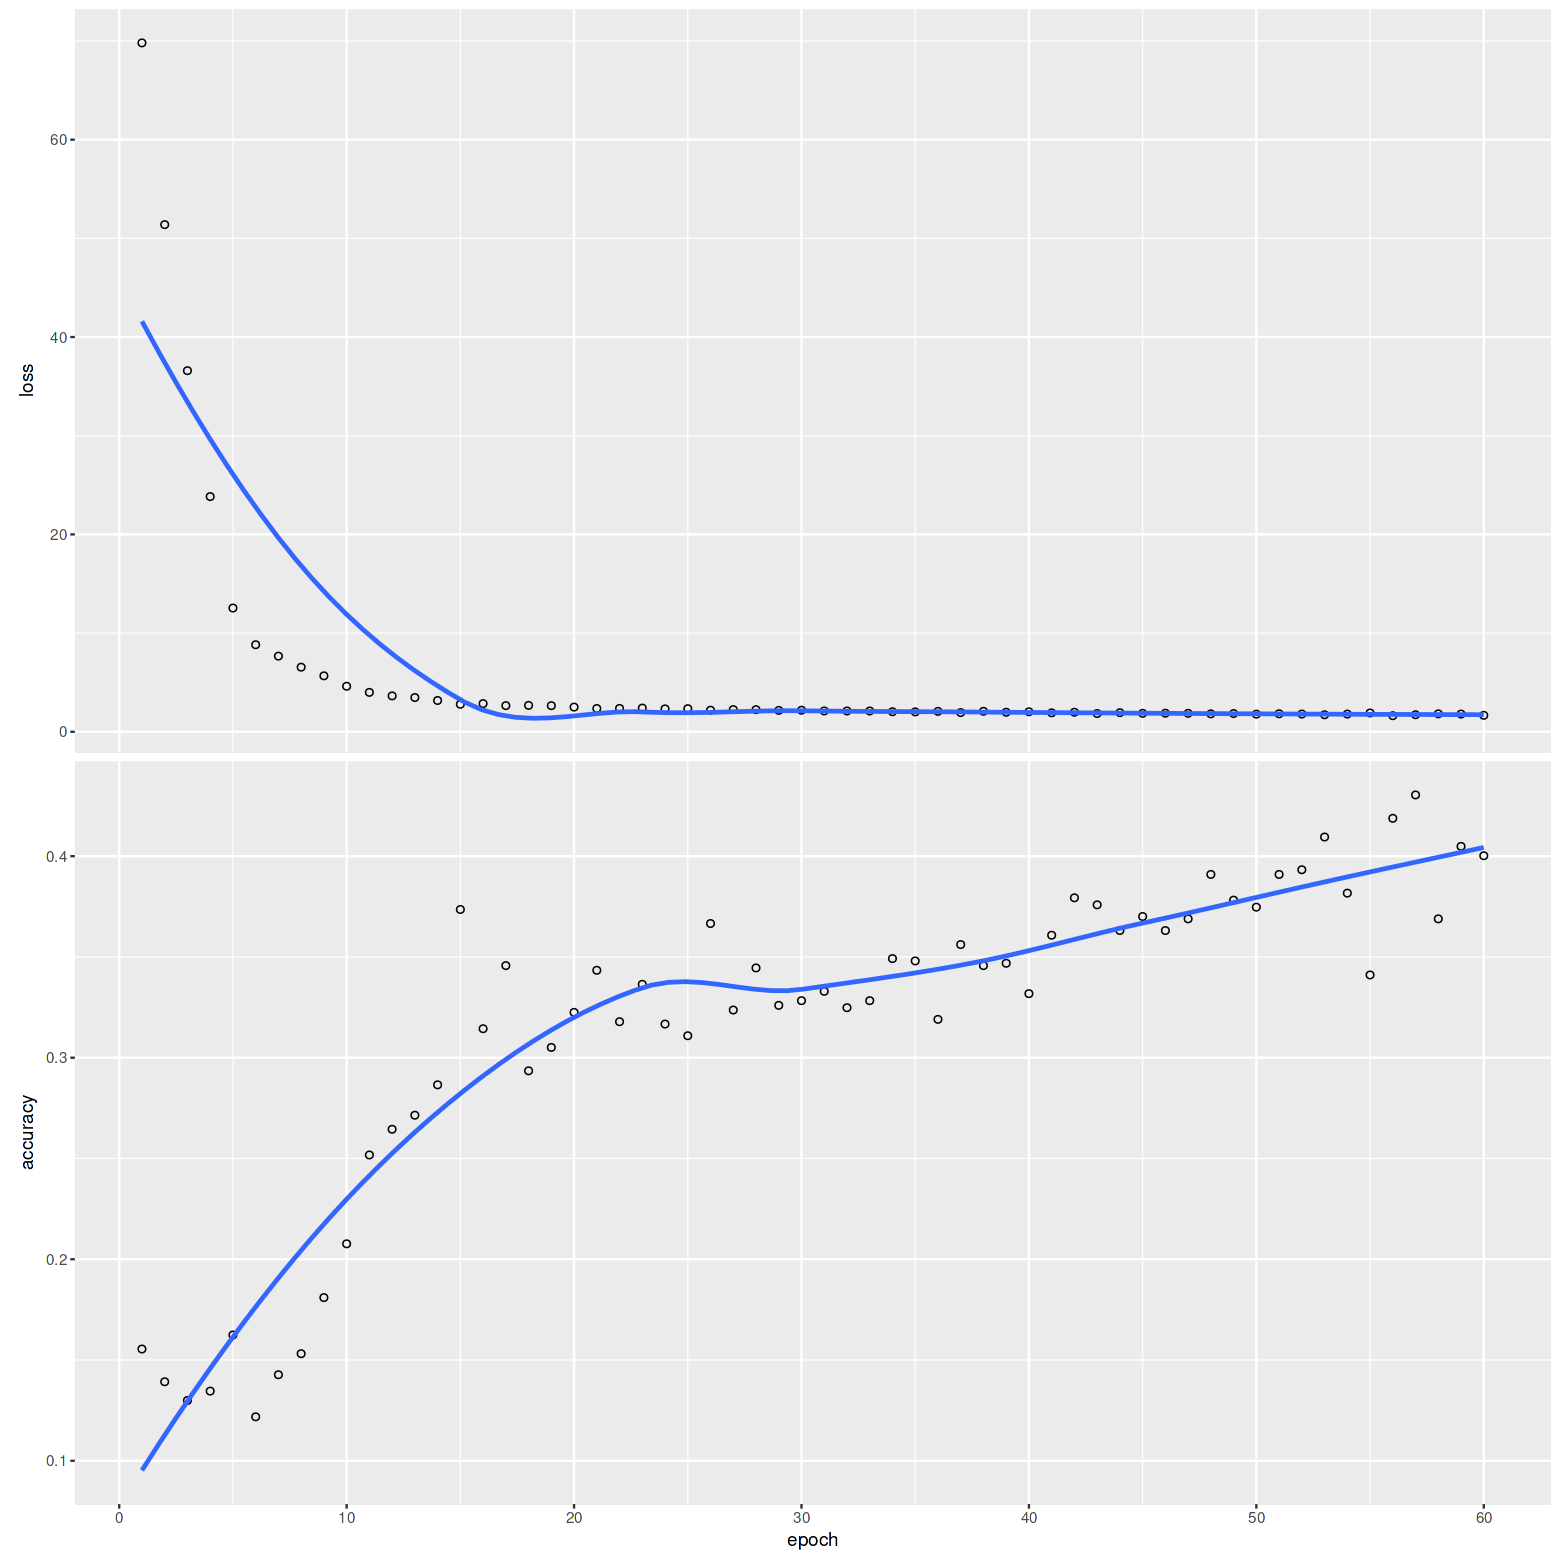

In [42]:
plot(history)

In [43]:
result <- model %>% evaluate(x_train, y_train)
result

loss  accuracy 
1.6743807 0.3839907

**Please leave your advice in the comments. Thank you**